# Regressió lineal i descens de gradient

En aquest notebook ensenyarem com un anàlisi de regressió ens permet entendre i preveure el comportament de les dades. A través d'unes mostre es fa un aprenentatge dels valors i la seva correlació.

Els objectius són els següents:
* Aplicar models de regressió, ficant l'èmfasi en: 
    1. Analitzar els atributs per seleccionar els més representatius i normalitzar-los.
    2. Avaluar correctament l'error del model 
    3. Visualitzar les dades i el model resultant
    4. Saber aplicar el procès de descens del gradient

* Ésser capaç d'aplicar tècniques de regressió en casos reals

* Validar els resultats en dades reals

* Fomentar la capacitat per presentar resultats tècnics d'aprenentatge computacional de forma adequada davant altres persones



Els atributs estan definits en kaggle [Boston House Prices](https://www.kaggle.com/vikrishnan/boston-house-prices), que al mateix moment estan defnits en UCI Machine Learning Repository1

    1. CRIM: tassa de criminalitat per capita en la ciutat.
    2. ZN: proporció de terreny residencial dividit en zones de 25.000 peus quadrats.
    3. INDUS: proporció de comerços no minoristes per ciutat.
    4. CHAS: és una variable per saber si limita amb un riu, (1 limita amb un riu; 0 en cas contrari).
    5. NOX: concentració d'òxid nítric (part per 10 milions)
    6. RM: mitjana d'habitacions per habitatge.
    7. AGE: proporció d'ocupabilitat pels propietaris a partir de 1940.
    8. DIS: distancia ponderada entre 5 llocs de treball
    9. RAD: índex d'accessibilitat per carretera
    10. TAX: taxa d'impost per la propietat de cada 10.000 dollars
    11. PTRATIO: rati d'alumne-professor per municipi
    12. B: proporció de persones negres en el municipi
    13. LSTAT: % de persones de baix estatus
    14. MEDV: mitjana del preu dels habitatges ocupats en 1000s dòlars


## Analitzant dades
Davant del conjunt de dades que teim disponibles, primer cal analtzarles i conèixer quins atributs són els més importants, quins tenen correlació entre ells i quins no són importants.

Primer mostrem quins camps hi ha a la base de dades juntament amb el tipus de dades que contenen. També es mostra que d'un total de 506 registres en total, tots els atributs tenen 506 valors. El fet de no tenir valors nuls simplifica el treball al no haver de filtrar o esborrar entrades sense tots els valors.

Tot i estar tots els valors en format de número (ja sigui decimal o enter), més endevant caldrà enstandaritzar-los per tal que tots tinguin el mateix pes durant l'aprenentatge. Més endevant es tractarà aquest tema. 

In [17]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import sklearn as sk
import numpy as np
import pandas as pd
%matplotlib notebook
%matplotlib inline


from matplotlib import pyplot as plt
import scipy.stats

import seaborn as sns
import cufflinks as cf
import plotly.offline

import ipywidgets as widgets

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

pd.set_option("display.max_columns", None)

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'MEDV']

database = pd.read_csv('housing.csv', delim_whitespace=True, names=names)


database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Per fer-nos una idea de les dades amb les que treballem, primer mostrem les 5 primeres entrades de la base de dades

In [18]:
database.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Mostrar una descripció de cada un dels atributs també ens ajuda a fer-nos una idea de cadascun d'ells.

In [19]:
database.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


La correlació entre dos atributs ens apropa encara més al nostre objectiu ja que ens permet veure quins estan relacionats entre ells.

A la taula inferior es veu la correlació entre dos atributs. Les cel·les amb fons groc són les que tenen la correlació per sobre de 0.7 i són amb les que, a priori, treballarem.

Cal mencionar que els valors obtinguts poden ser negatius o positius. ja sigui una correlació directa o inversa respectivamet.

In [20]:
def negatives(val):

    if val < 0 :
        color = 'red'
    else:
        color = 'black'
        
    return f'color: {color}'

def undeline(val):
    if abs(val) > 0.7 and abs(val) < 1:
        background = "yellow"
    else:
        background = "None"
        
    return f'background-color:{background}'

database.corr().style.applymap(undeline).applymap(negatives)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


La correlació també es pot mostrar d'una forma més gràfica amb la següent imatge:

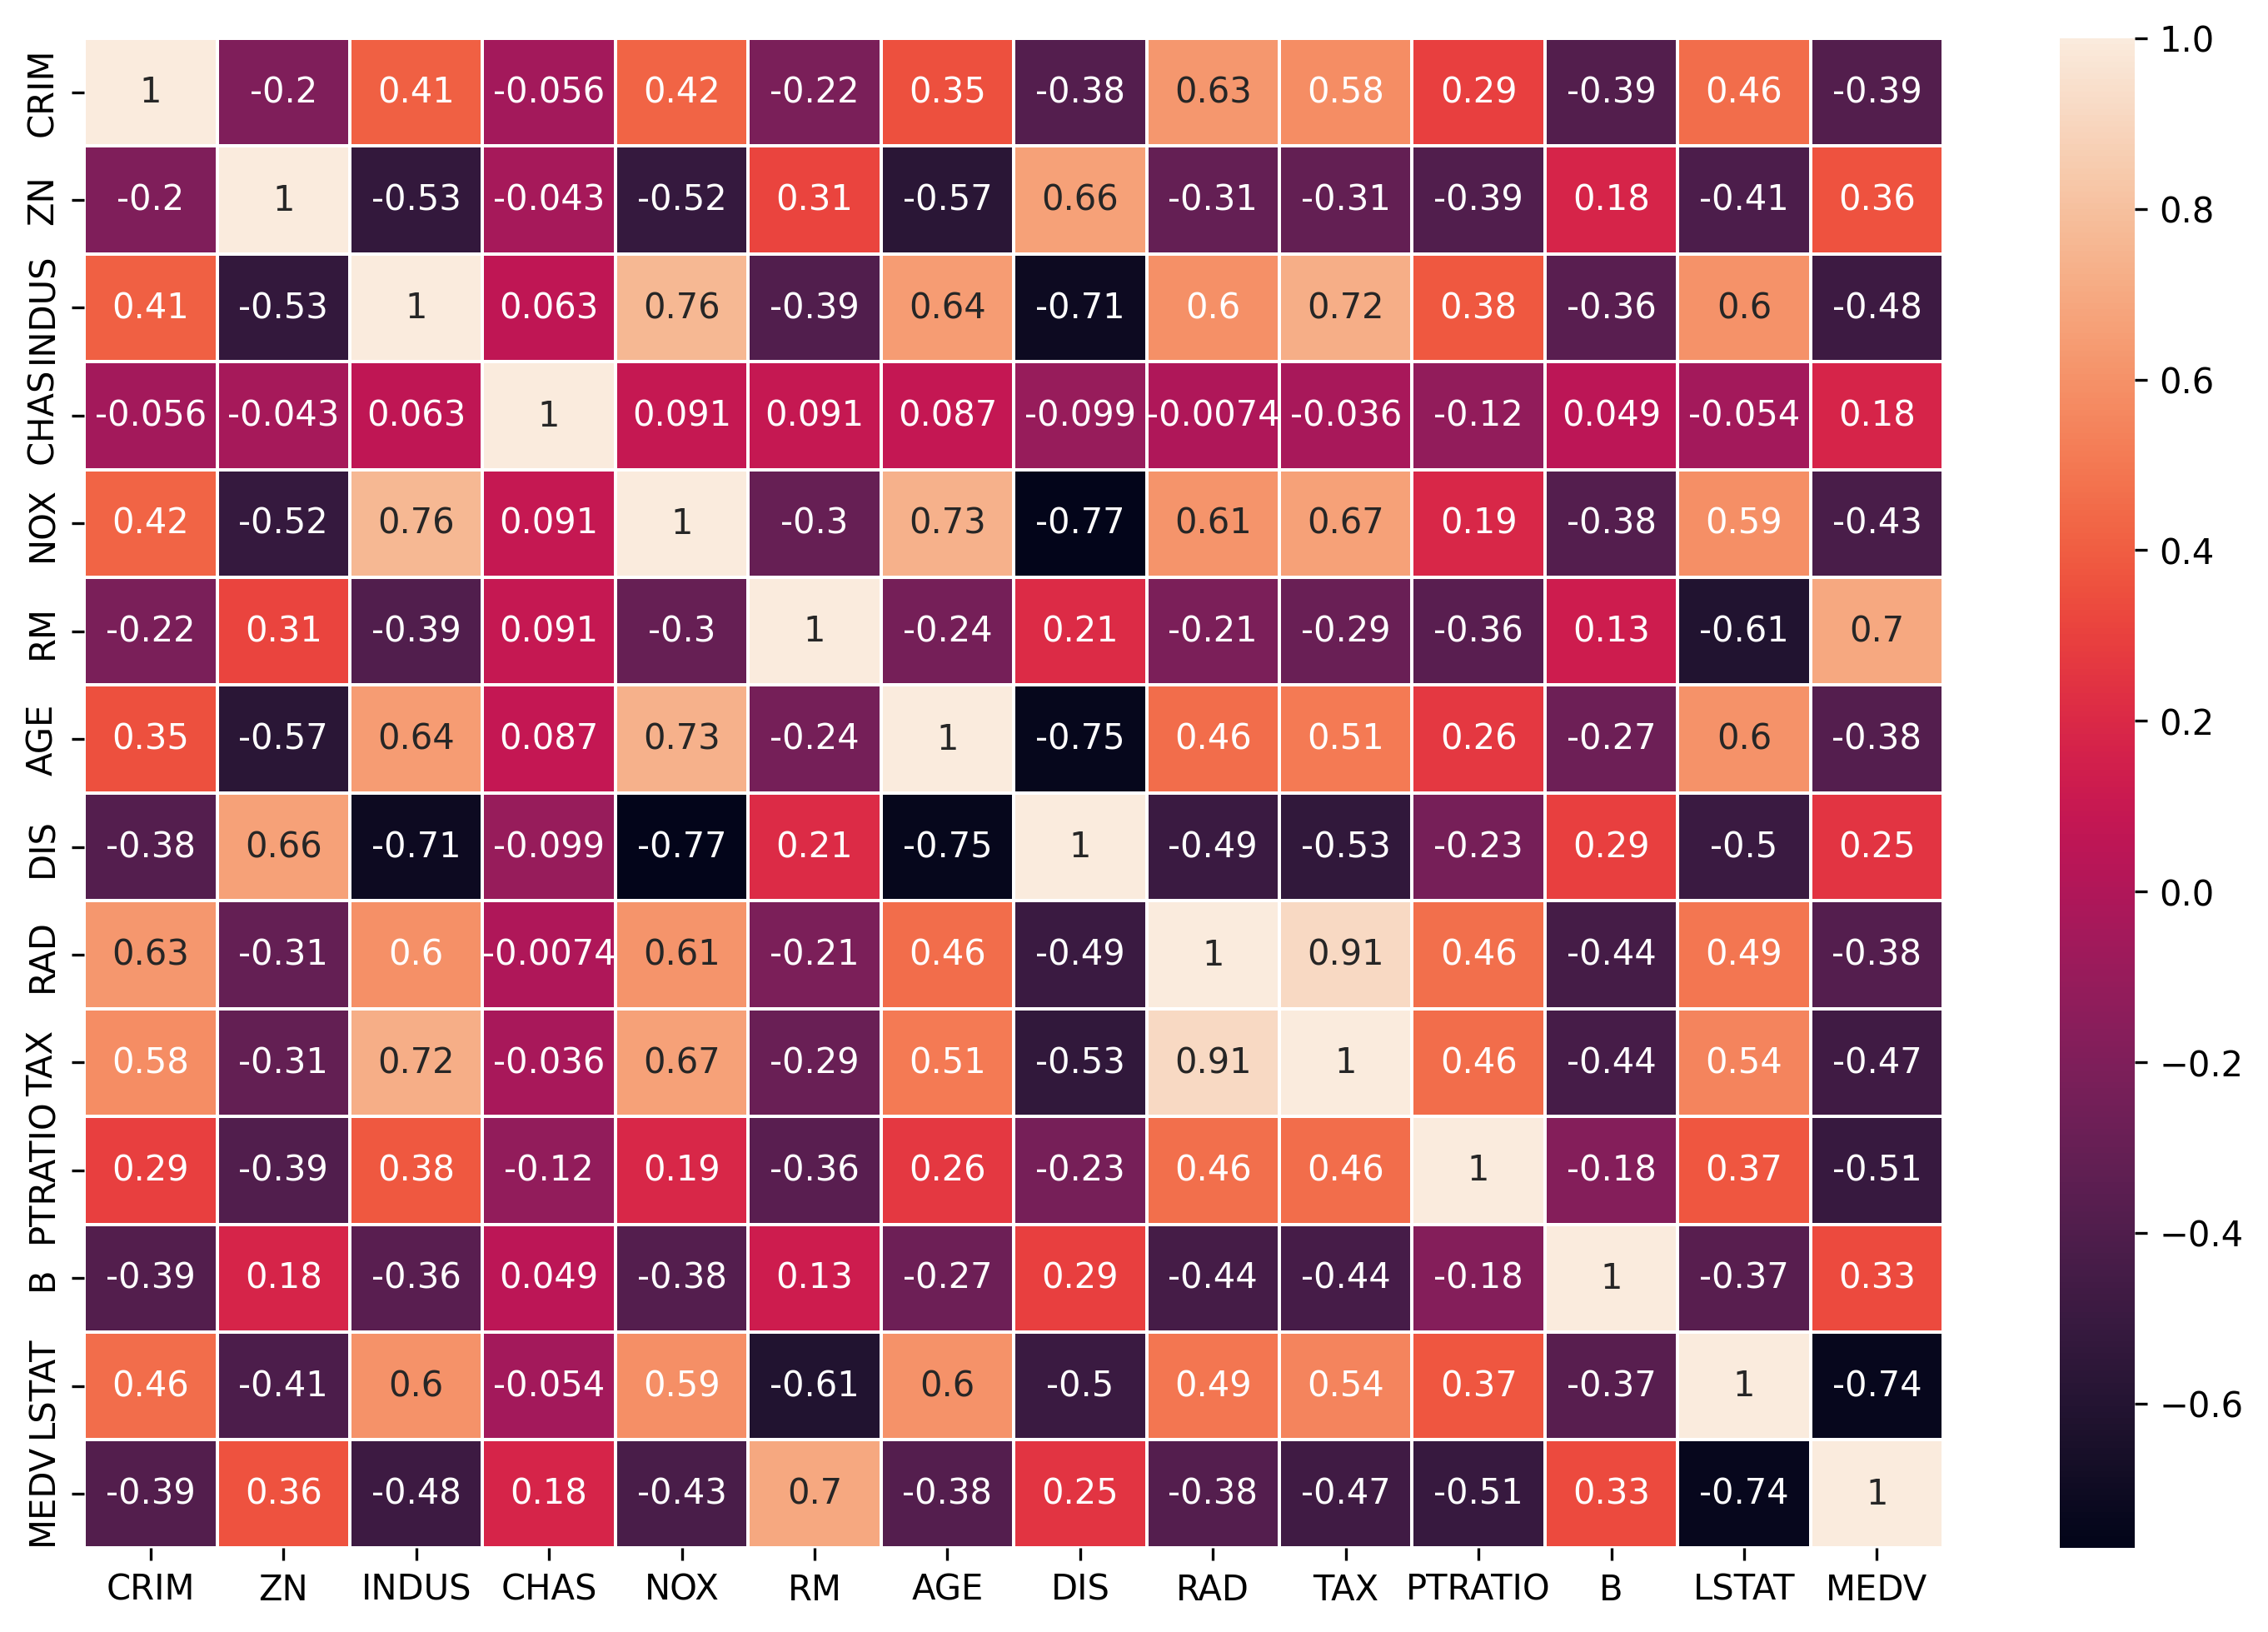

In [21]:
plt.figure(figsize=(12,8), dpi=300)
sns.heatmap(database.corr(), annot=True, linewidths=.5, cmap='rocket');

# mes tipos de paletes de colors: https://seaborn.pydata.org/tutorial/color_palettes.html 

In [22]:
#sns.pairplot(database)
#plt.show()

In [23]:
from IPython.core.display import display

toggle = widgets.ToggleButtons(
    options=names, 
    style={"button_width": "130px"},
)

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))

def onClick(obj):
    with out:
        if obj['new']:
            out.clear_output()
            database[obj.new].iplot(kind="hist", title=obj.new, bins=15)
            database[obj.new].iplot(kind="box", title=obj.new, boxpoints="all")
            
            
display(widgets.Label(value="Escull un per mostrar, el primer cop s'ha de seleccionar un que no sigui CRIM"))
toggle.observe(onClick, 'value')
display(toggle)
display(out)

Label(value="Escull un per mostrar, el primer cop s'ha de seleccionar un que no sigui CRIM")

ToggleButtons(options=('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',…

Output(layout=Layout(border='1px solid black'))

Quin és el tipus de cada atribut?

Quins atributs tenen una distribució Guassiana?

Quin és l'atribut objectiu? Per què?

### Primeres regresions



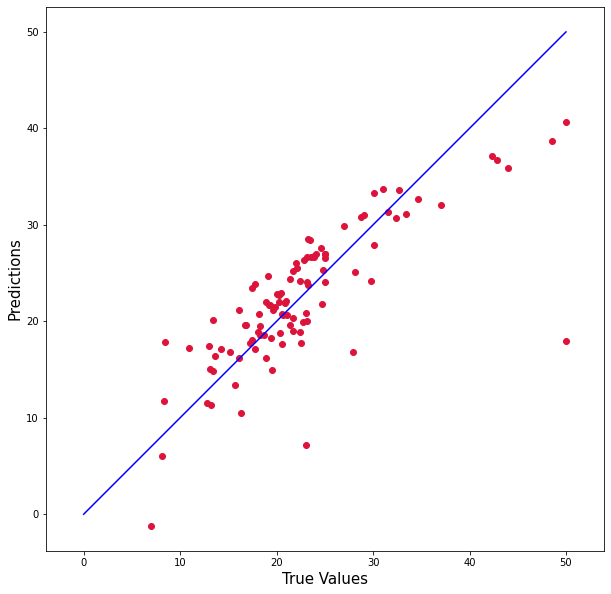

5
Coefficients: [ 0.07650323  5.19262911 -0.00536302 -0.8844173  -0.50044756]
Intercept: 13.86289884965366
Mean Squared Error:  26.334619100373835
Coefficient of determination:  0.6142947446863213


In [24]:
    from sklearn.metrics import mean_squared_error, r2_score

    
    
    X = database.drop(columns=['CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'B'])
    y = X.MEDV
    X = X.drop(columns='MEDV')


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1845)

    regr = LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)


    #X_testValues = X_test.values
    #y_testValues = y_test.values

    plt.figure(figsize=(10,10))
    plt.scatter(y_test, y_pred, c='crimson')
#     p1 = max(max(y_pred), max(y_test))
    p1 = 50
    p2 = 0
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

    print(len(X.columns))
    print("Coefficients:", regr.coef_)
    print("Intercept:", regr.intercept_)
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("Coefficient of determination: ", r2_score(y_test, y_pred))

Ara provem estandaritzant els valors:

<AxesSubplot:>

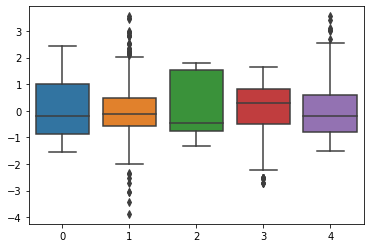

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
scaledX = scaler.transform(X)
scaledXdf = pd.DataFrame(scaledX)
#scaledXdf.columns = names[:-1]
# print(scaledXdf.describe())
# print(pd.DataFrame(X).describe())

# sns.boxplot(data=X)
sns.boxplot(data=scaledXdf)


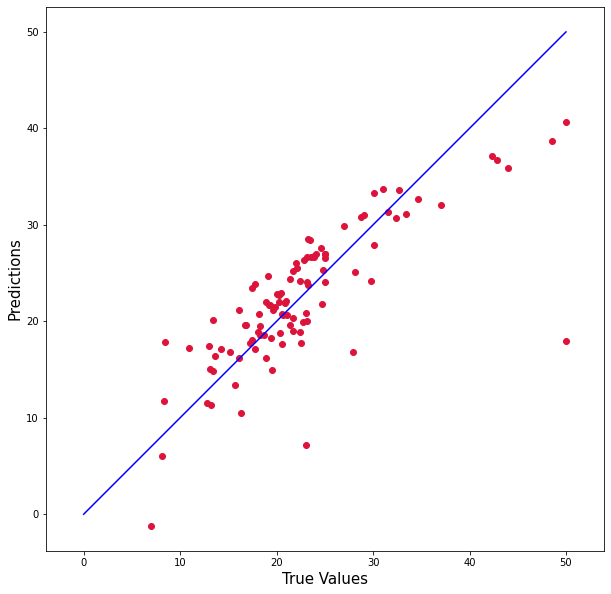

Coefficients: [ 0.5243203   3.64482328 -0.90297369 -1.91282232 -3.5701937 ]
Intercept: 22.50470373800518
Mean Squared Error:  26.33461910037401
Coefficient of determination:  0.6142947446863187


In [26]:

    X_train, X_test, y_train, y_test = train_test_split(scaledXdf, y, test_size=0.2, random_state=1845)

    regr = LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)

    plt.figure(figsize=(10,10))
    plt.scatter(y_test, y_pred, c='crimson')
#     p1 = max(max(y_pred), max(y_test))
    p1 = 50
    p2 = 0
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

    print("Coefficients:", regr.coef_)
    print("Intercept:", regr.intercept_)
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("Coefficient of determination: ", r2_score(y_test, y_pred))

Provant de reduir característiques utilitzant PCA

59.39743855461967

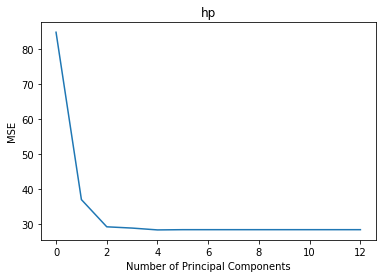

In [27]:
#https://www.statology.org/principal-components-regression-in-python/

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 13):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

PCA number of components:  4
Coefficients: [-4.15981323  3.2681356   0.95329093  1.44228143]
Intercept: 22.521039603960396
Mean Squared Error:  25.872657174599425
Coefficient of determination:  0.6210607868245


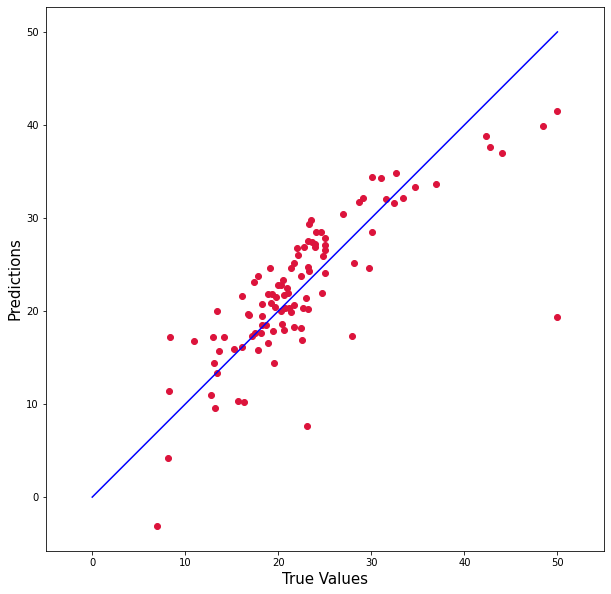

In [28]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1845)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

# pca = PCA(n_components=7)
pca = PCA(0.95)
pca.fit(X_train_scaled)
print("PCA number of components: ", pca.n_components_)
X_train_scaled = pca.transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)

regr = LinearRegression()
regr.fit(X_train_scaled, y_train)
y_pred = regr.predict(X_test_scaled)
print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Coefficient of determination: ", r2_score(y_test, y_pred))

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
#     p1 = max(max(y_pred), max(y_test))
p1 = 50
p2 = 0
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()
